# Visualization

Visualizing the results from the [notebook.ipynb](./notebook.ipynb) where Machine Learning models were trained and evaluated.

In [1]:
from utils.utils import Pickler

import matplotlib.pyplot as plt
import numpy as np

## Data

In [2]:
filename = './data/metrics.pkl'
validation_results, hyperparameter_results, testing_results = Pickler(filename).load()

In [3]:
print(validation_results.keys())

dict_keys(['linear_regression', 'ridge_regression', 'lasso_regression', 'decision_tree_regressor', 'random_forest_regressor', 'svr', 'k_neighbors_regressor'])


In [4]:
data = {
    'validation': validation_results,
    # 'hyperparameter': hyperparameter_results,
    'testing': testing_results
}

In [5]:
for step in data:
    print(f"Step: {step}")
    for model in data[step]:
        print(f"  {model}: {data[step][model].keys()}")

Step: validation
  linear_regression: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  ridge_regression: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  lasso_regression: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  decision_tree_regressor: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  random_forest_regressor: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  svr: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  k_neighbors_regressor: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
Step: testing
  linear_regression: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  ridge_regression: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  lasso_regression: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  decision_tree_regressor: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])
  random_forest_regressor: dict_keys(['y_hat', 'MAE', 'MSE', 'RMSE', 'RMSE%', 'R^2'])

# Scores

In [6]:
r2_scores = {}
rmse_scores = {}

for step in data:
    for model in data[step]:
        if model not in r2_scores:
             r2_scores[model] = []
             rmse_scores[model] = []

# Now populate with values
for step in data:
    for model in data[step]:
        # Append to the correct dictionary
        r2_scores[model].append(data[step][model]['R^2'])
        rmse_scores[model].append(data[step][model]['RMSE'])

print(r2_scores)
print(rmse_scores)

{'linear_regression': [0.9999879425647927, 0.9999931218519884], 'ridge_regression': [0.9999879425268172, 0.9999931201986686], 'lasso_regression': [0.9999878068754641, 0.9999930045133907], 'decision_tree_regressor': [0.9953469877643167, 0.9870672499947177], 'random_forest_regressor': [0.9980284414840266, 0.9862333912584443], 'svr': [-0.08864308106910368, -0.08110404204670663], 'k_neighbors_regressor': [0.9518290951751973, 0.9782351668660457]}
{'linear_regression': [2482.7147492711138, 2031.3722982984434], 'ridge_regression': [2482.718658989463, 2031.6164269699175], 'lasso_regression': [2496.645382810366, 2048.626243726945], 'decision_tree_regressor': [48771.538220571616, 88084.44218089311], 'random_forest_regressor': [31747.10962300838, 90879.77683054713], 'svr': [746005.6457936603, 805355.2843339902], 'k_neighbors_regressor': [156924.86289557352, 114269.79231035804]}


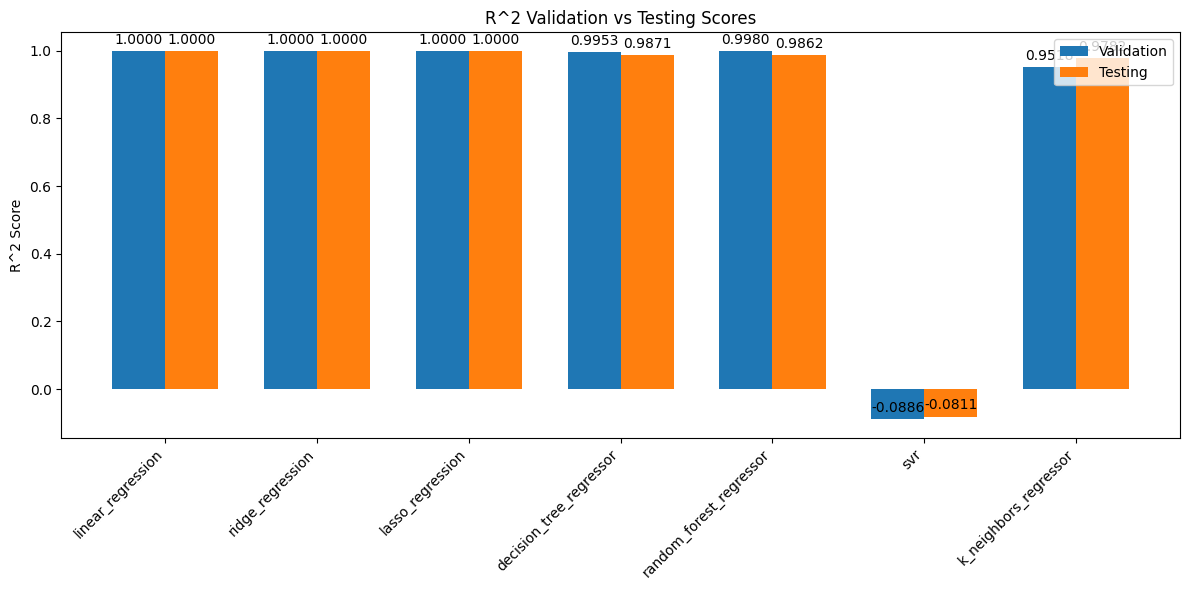

In [7]:
models = list(r2_scores.keys())
validation_scores = [scores[0] for scores in r2_scores.values()]
testing_scores = [scores[1] for scores in r2_scores.values()]

x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, validation_scores, width, label='Validation')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Validation vs Testing Scores')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./image/r2_scores.png')
plt.show()

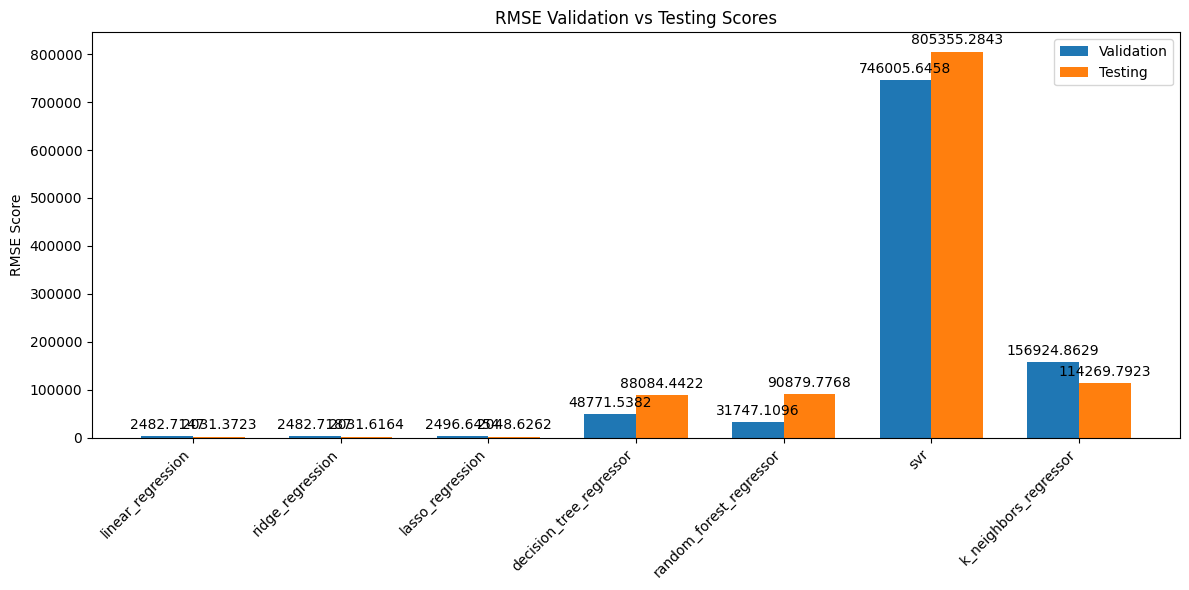

In [8]:
models = list(rmse_scores.keys())
validation_scores = [scores[0] for scores in rmse_scores.values()]
testing_scores = [scores[1] for scores in rmse_scores.values()]

x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, validation_scores, width, label='Validation')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Score')
ax.set_title('RMSE Validation vs Testing Scores')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./image/rmse_scores.png')
plt.show()